In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
!pwd

/content


Angry Data Check

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd, seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
import glob
# get data file names
path =r"/content/drive/MyDrive/testData/5dec/processed_angry_820"
image_count = 600
filenames = glob.glob(path + "/*.csv")
#print(filenames)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
print(len(dfs))
# Concatenate all data into one DataFrame
df_angry = pd.concat(dfs, ignore_index=True)
# Remove empty spaces in column names.
df_angry.columns = [col.replace(" ", "") for col in df_angry.columns]
# Print few values of data.
#print(f"Max number of frames {df_angry.frame.max()}", f"\nTotal shape of dataframe {df_angry.shape}")
print(f'shape: {df_angry.shape}')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
print ('Count of deteced faces with confidence larger than 0.8: %s' % (df_angry[df_angry["confidence"] > 0.8]['confidence'].count()))
print (f'Overall Accuracy of {image_count} images: %.3f%%' % ((df_angry[df_angry["confidence"] > 0.8]['confidence'].count() / image_count * 100)))

500
shape: (540, 711)
Count of deteced faces with confidence larger than 0.8: 430
Overall Accuracy of 600 images: 71.667%


Happy Data Check

In [ ]:
# get data file names
path =r"/content/drive/MyDrive/testData/5dec/processed_happy_820"
filenames = glob.glob(path + "/*.csv")
print(len(filenames))
image_count = 600
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
print(len(dfs))
# Concatenate all data into one DataFrame
df_happy = pd.concat(dfs, ignore_index=True)
# Remove empty spaces in column names.
df_happy.columns = [col.replace(" ", "") for col in df_happy.columns]
# Print few values of data.
#print(f"Max number of frames {df_happy.frame.max()}", f"\nTotal shape of dataframe {df_happy.shape}")
print(f'shape: {df_happy.shape}')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
print ('Count of deteced faces with confidence larger than 0.8: %s' % (df_happy[df_happy["confidence"] > 0.8]['confidence'].count()))
print (f'Overall Accuracy of {image_count} images: %.3f%%' % ((df_happy[df_happy["confidence"] > 0.8]['confidence'].count() / image_count * 100)))

497
497
shape: (543, 711)
Count of deteced faces with confidence larger than 0.8: 459
Overall Accuracy of 600 images: 76.500%


Crying Data Check

In [ ]:
# get data file names
path =r"/content/drive/MyDrive/testData/5dec/processed_crying_820"
image_count = 600
filenames = glob.glob(path + "/*.csv")
#print(filenames)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
print(len(dfs))
# Concatenate all data into one DataFrame
df_crying = pd.concat(dfs, ignore_index=True)
# Remove empty spaces in column names.
df_crying.columns = [col.replace(" ", "") for col in df_crying.columns]
# Print few values of data.
#print(f"Max number of frames {df_crying.frame.max()}", f"\nTotal shape of dataframe {df_crying.shape}")
print(f'shape: {df_crying.shape}')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
print ('Count of deteced faces with confidence larger than 0.8: %s' % (df_crying[df_crying["confidence"] > 0.8]['confidence'].count()))
print (f'Overall Accuracy of {image_count} images: %.3f%%' % ((df_crying[df_crying["confidence"] > 0.8]['confidence'].count() / image_count * 100)))

487
shape: (528, 711)
Count of deteced faces with confidence larger than 0.8: 419
Overall Accuracy of 600 images: 69.833%


Clean and Construct Data

In [ ]:
df_arr = [df_angry, df_happy, df_crying]
clean_df_arr = []
for i, df in enumerate(df_arr):
  #keep face detection that has more than 0.8 confidence
  df = df[df['confidence'] > 0.8]
  #filter columns (get AU columns only)
  df = df.filter(regex=('^AU.*r$'))
  #add class index 0 - angry, 1 - happy, 2 - crying
  df["label"] = str(i)
  clean_df_arr.append(df)
print(f'angry data count: {len(clean_df_arr[0])}, shape: {clean_df_arr[0].shape}\nhappy data count: {len(clean_df_arr[1])}, shape: {clean_df_arr[1].shape} \ncrying data count: {len(clean_df_arr[2])}, shape: {clean_df_arr[2].shape}')
#concat the list of arr to one df for ML
#clean_data = pd.concat(clean_df_arr, ignore_index=True)
#print(f'total data shape:{clean_data.shape}')
#cleaned_data

angry data count: 430, shape: (430, 18)
happy data count: 459, shape: (459, 18) 
crying data count: 419, shape: (419, 18)


ML training

train data shape: (1046, 18)
test data shape: (262, 18)

Epoch 00001: val_accuracy improved from -inf to 0.31905, saving model to ./drive/MyDrive/best_model.h5

Epoch 00002: val_accuracy improved from 0.31905 to 0.51905, saving model to ./drive/MyDrive/best_model.h5

Epoch 00003: val_accuracy improved from 0.51905 to 0.74286, saving model to ./drive/MyDrive/best_model.h5

Epoch 00004: val_accuracy improved from 0.74286 to 0.75714, saving model to ./drive/MyDrive/best_model.h5

Epoch 00005: val_accuracy improved from 0.75714 to 0.77143, saving model to ./drive/MyDrive/best_model.h5

Epoch 00006: val_accuracy improved from 0.77143 to 0.79524, saving model to ./drive/MyDrive/best_model.h5

Epoch 00007: val_accuracy improved from 0.79524 to 0.80476, saving model to ./drive/MyDrive/best_model.h5

Epoch 00008: val_accuracy improved from 0.80476 to 0.81905, saving model to ./drive/MyDrive/best_model.h5

Epoch 00009: val_accuracy improved from 0.81905 to 0.83333, saving model to ./drive/MyDriv

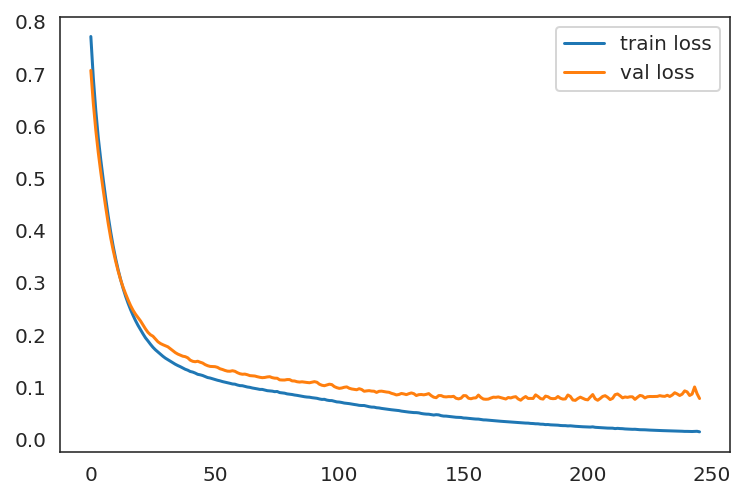

In [ ]:
import tensorflow as tf
from numpy import random
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from keras.models import model_from_json

num_features = 17
train_df_arr = []
test_df_arr = []
for df in clean_df_arr:
  train, test = train_test_split(df, test_size=0.2)
  train_df_arr.append(train)
  test_df_arr.append(test)
#concat data from different expression
train_data = pd.concat(train_df_arr, ignore_index=True)
test_data = pd.concat(test_df_arr, ignore_index=True)
#shuffle data
train_data = train_data.sample(frac=1)
test_data = test_data.sample(frac=1)
#transform label column to columns by class with boolean value: angry('0': 1, '1', 0, '2', 1)
y_train = train_data['label'].str.get_dummies()
y_test = test_data['label'].str.get_dummies()
print(f'train data shape: {train_data.shape}')
print(f'test data shape: {test_data.shape}')
# neural network
model = Sequential()
#input layer, input_shape(<num features>)
model.add(Dense(64, activation='relu', input_shape=(num_features,)))
#hidden layer
model.add(Dense(32, activation='relu'))
#output layer
model.add(Dense(3, activation='sigmoid'))
# opt = SGD(lr=0.0202, momentum=0.9)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
# model check point to save model that has the best accuracy
mc = ModelCheckpoint('./drive/MyDrive/best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
#train
history = model.fit(train_data.drop(['label'], axis = 1), y_train, validation_split=0.2, epochs=1000, batch_size=256, verbose=0, callbacks=[es, mc])
#test
#y_predict = model.predict(test_data.drop(['label'], axis = 1))
saved_model = load_model('./drive/MyDrive/best_model.h5')
result_stat = saved_model.evaluate(test_data.drop(['label'], axis = 1), y_test)
print(f'test loss: {result_stat[0]}\ntest accuracy: {result_stat[1]}')
# plot training history
pyplot.plot(history.history['loss'], label='train loss')
pyplot.plot(history.history['val_loss'], label='val loss')
pyplot.legend()
pyplot.show()
# serialize model to JSON
model_json = model.to_json()
with open("./drive/MyDrive/model.json", "w") as json_file:
    json_file.write(model_json)

Test on real faces data

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd, seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
import glob
# get data file names
path =r"/content/drive/MyDrive/testData/5dec/processed_angry_real"
image_count = 6
filenames = glob.glob(path + "/*.csv")
#print(filenames)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
print(len(dfs))
# Concatenate all data into one DataFrame
df_angry_real = pd.concat(dfs, ignore_index=True)
# Remove empty spaces in column names.
df_angry_real.columns = [col.replace(" ", "") for col in df_angry_real.columns]
# Print few values of data.
#print(f"Max number of frames {df_angry_real.frame.max()}", f"\nTotal shape of dataframe {df_angry_real.shape}")
print(f'shape: {df_angry_real.shape}')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
print ('Count of deteced faces with confidence larger than 0.8: %s' % (df_angry_real[df_angry_real["confidence"] > 0.8]['confidence'].count()))
print (f'Overall Accuracy of {image_count} images: %.3f%%' % ((df_angry_real[df_angry_real["confidence"] > 0.8]['confidence'].count() / image_count * 100)))

6
shape: (6, 711)
Count of deteced faces with confidence larger than 0.8: 6
Overall Accuracy of 6 images: 100.000%


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd, seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
import glob
# get data file names
path =r"/content/drive/MyDrive/testData/5dec/processed_happy_real"
image_count = 6
filenames = glob.glob(path + "/*.csv")
#print(filenames)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
print(len(dfs))
# Concatenate all data into one DataFrame
df_happy_real = pd.concat(dfs, ignore_index=True)
# Remove empty spaces in column names.
df_happy_real.columns = [col.replace(" ", "") for col in df_happy_real.columns]
# Print few values of data.
#print(f"Max number of frames {df_happy_real.frame.max()}", f"\nTotal shape of dataframe {df_happy_real.shape}")
print(f'shape: {df_happy_real.shape}')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
print ('Count of deteced faces with confidence larger than 0.8: %s' % (df_happy_real[df_happy_real["confidence"] > 0.8]['confidence'].count()))
print (f'Overall Accuracy of {image_count} images: %.3f%%' % ((df_happy_real[df_happy_real["confidence"] > 0.8]['confidence'].count() / image_count * 100)))

6
shape: (6, 711)
Count of deteced faces with confidence larger than 0.8: 6
Overall Accuracy of 6 images: 100.000%


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd, seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
import glob
# get data file names
path =r"/content/drive/MyDrive/testData/5dec/processed_crying_real"
image_count = 6
filenames = glob.glob(path + "/*.csv")
#print(filenames)
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))
print(len(dfs))
# Concatenate all data into one DataFrame
df_crying_real = pd.concat(dfs, ignore_index=True)
# Remove empty spaces in column names.
df_crying_real.columns = [col.replace(" ", "") for col in df_crying_real.columns]
# Print few values of data.
#print(f"Max number of frames {df_crying_real.frame.max()}", f"\nTotal shape of dataframe {df_crying_real.shape}")
print(f'shape: {df_crying_real.shape}')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
print ('Count of deteced faces with confidence larger than 0.8: %s' % (df_crying_real[df_crying_real["confidence"] > 0.8]['confidence'].count()))
print (f'Overall Accuracy of {image_count} images: %.3f%%' % ((df_crying_real[df_crying_real["confidence"] > 0.8]['confidence'].count() / image_count * 100)))

6
shape: (6, 711)
Count of deteced faces with confidence larger than 0.8: 6
Overall Accuracy of 6 images: 100.000%


[   AU01_r  AU02_r  AU04_r  AU05_r  AU06_r  ...  AU23_r  AU25_r  AU26_r  AU45_r  label
0    1.16    0.41    3.03    1.14    2.96  ...     0.0    4.55    0.97    0.00      0
1    0.00    0.00    1.21    0.25    2.11  ...     0.0    3.20    0.61    0.00      0
2    0.00    0.00    2.17    0.54    1.00  ...     1.0    0.00    0.18    0.00      0
3    0.00    0.00    1.19    0.44    1.10  ...     0.0    0.00    0.00    0.17      0
4    0.00    0.00    1.02    0.00    2.28  ...     0.0    2.96    0.00    0.00      0
5    2.35    1.57    0.26    2.33    1.22  ...     0.0    1.12    0.00    0.00      0

[6 rows x 18 columns],    AU01_r  AU02_r  AU04_r  AU05_r  AU06_r  ...  AU23_r  AU25_r  AU26_r  AU45_r  label
0    1.16    0.81    0.00    1.02    2.42  ...    0.00    2.70    0.24     0.0      1
1    0.00    0.00    0.60    0.00    2.72  ...    0.26    2.45    0.22     0.0      1
2    0.00    0.00    0.00    0.00    0.86  ...    0.00    1.11    0.00     0.0      1
3    0.19    0.05    0.00    

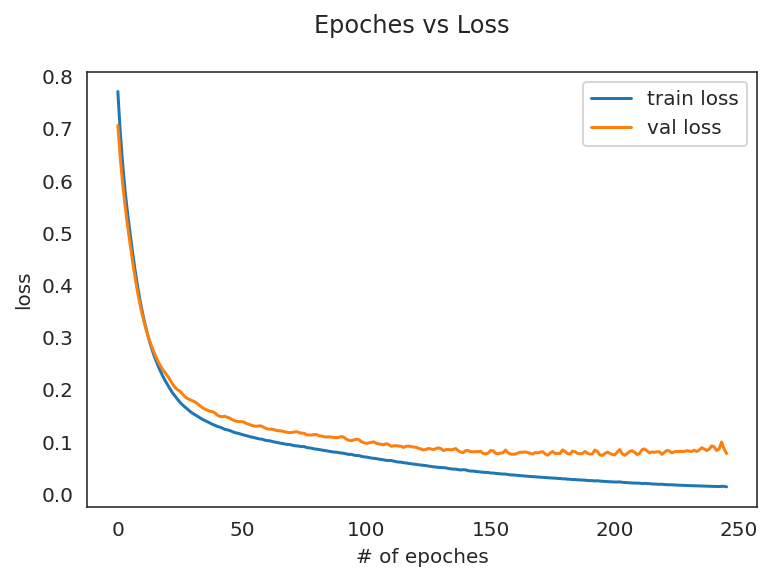

                             Loss  Accuracy(%)
Synthetic Human Testset  0.104642    93.893129
Real Human Testset       0.848520    72.222221


In [ ]:
import numpy as np
df_real_arr = [df_angry_real, df_happy_real, df_crying_real]
#df_real_arr = [df_angry_real]
real_df_arr = []
for i, df in enumerate(df_real_arr):
  #keep face detection that has more than 0.8 confidence
  df = df[df['confidence'] > 0.8]
  #filter columns (get AU columns only)
  df = df.filter(regex=('^AU.*r$'))
  #add class index 0 - angry, 1 - happy, 2 - crying
  df["label"] = str(i)
  real_df_arr.append(df)
#print(f'angry data count: {len(real_df_arr[0])}, shape: {real_df_arr[0].shape}\nhappy data count: {len(real_df_arr[1])}, shape: {real_df_arr[1].shape} \ncrying data count: {len(real_df_arr[2])}, shape: {real_df_arr[2].shape}')

num_features = 17
df_arr_real = []
print(real_df_arr )

#concat data from different expression
test_data_real_2 = pd.concat(real_df_arr, ignore_index=True)
#shuffle data
test_data_real_2 = test_data_real_2.sample(frac=1)
#transform label column to columns by class with boolean value: angry('0': 1, '1', 0, '2', 0)
y_test_real = test_data_real_2['label'].str.get_dummies()
print(f'test data shape: {test_data_real_2.shape} {y_test_real.shape}')


json_file = open("./drive/MyDrive/model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./drive/MyDrive/best_model.h5")
print("Loaded model from disk")
x = test_data_real_2.drop(['label'], axis = 1)
print(test_data_real_2)
ynew = loaded_model.predict_classes(x)
print(ynew)
# show the inputs and predicted outputs
#for i in range(len(x)):
	#print("X=%s, Predicted=%s" % (x[i], ynew[i]))
#prediction = np.round(loaded_model.predict(x))
#wrong_predictions = x[prediction != y_test_real]
# indices = [i for i,v in enumerate(pred) if pred[i]!=y_test_real[i]]
# subset_of_wrongly_predicted = [x[i] for i in indices]

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(test_data_real_2.drop(['label'], axis = 1), y_test_real, verbose=0)
#print('test loss: %.4f\ntest accuracy: %.2f%%' % (result_stat[0], result_stat[1]*100))
# plot training history
pyplot.plot(history.history['loss'], label='train loss')
pyplot.plot(history.history['val_loss'], label='val loss')
pyplot.legend()
pyplot.suptitle('Epoches vs Loss')
pyplot.ylabel('loss')
pyplot.xlabel('# of epoches')
pyplot.show()
#print("%s on real human face: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

data = {'Loss': [result_stat[0], score[0]],
        'Accuracy(%)': [result_stat[1]*100, score[1]*100]
        }

df = pd.DataFrame(data, columns = ['Loss', 'Accuracy(%)'] ,index = ['Synthetic Human Testset', 'Real Human Testset'])
print(df)

In [ ]:
data = {'Percentage of detectable pictures(%)': [74.38, 70.21, 60.32],
        '300 images in Memory(mb)': [790.8, 195.5, 27.9]
        }

df = pd.DataFrame(data, columns = ['Percentage of detectable pictures(%)', '300 images in Memory(mb)'] ,index = ['1792x1267(original image size)', '820x580(our choice)', '256x181'])
print(df)

                                Percentage of detectable pictures(%)  300 images in Memory(mb)
1792x1267(original image size)                                 74.38                     790.8
820x580(our choice)                                            70.21                     195.5
256x181                                                        60.32                      27.9
